<a href="https://colab.research.google.com/github/jameseconnolly/jameseconnolly.github.io/blob/main/GHG_Spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# //  Importing necessary stuff
import requests
import pandas as pd

In [2]:
url=("https://services9.arcgis.com/weJ1QsnbMYJlCHdG/arcgis/rest/services/Indicator_14_Expenditure_on_Environmental_Protection/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")

In [3]:
response = requests.get(url)

In [4]:
# // Checking the status code of the response to ensure it was successful
if response.status_code == 200:
    # // convert to json
    data = response.json()
    
    # // extract the 'features' field from the JSON object
    features = data['features']
    
    # // creating empty list to store the data
    records = []
    
    # // loop through the features and extract the 'attributes' field from each feature
    for feature in features:
        attributes = feature['attributes']
        
        # // append attributes
        records.append(attributes)
    
    # // df is append of attributes
    df = pd.DataFrame.from_records(records)
    
    print(df)
else:
    # // If unsuccessful, print the status code
    print(response.status_code)

      ObjectId                       Country ISO2 ISO3  \
0            1  Afghanistan, Islamic Rep. of   AF  AFG   
1            2  Afghanistan, Islamic Rep. of   AF  AFG   
2            3  Afghanistan, Islamic Rep. of   AF  AFG   
3            4  Afghanistan, Islamic Rep. of   AF  AFG   
4            5  Afghanistan, Islamic Rep. of   AF  AFG   
...        ...                           ...  ...  ...   
1518      1719                        Zambia   ZM  ZMB   
1519      1720                        Zambia   ZM  ZMB   
1520      1721                        Zambia   ZM  ZMB   
1521      1722                        Zambia   ZM  ZMB   
1522      1723                        Zambia   ZM  ZMB   

                                              Indicator  \
0     Expenditure on biodiversity & landscape protec...   
1     Expenditure on biodiversity & landscape protec...   
2                 Expenditure on environment protection   
3                 Expenditure on environment protection   
4       

In [5]:
# //  Find data I need 
unique_Indicator = df['Indicator'].unique()
print(unique_Indicator)

['Expenditure on biodiversity & landscape protection'
 'Expenditure on environment protection'
 'Expenditure on environmental protection n.e.c.'
 'Expenditure on environmental protection R&D'
 'Expenditure on pollution abatement' 'Expenditure on waste management'
 'Expenditure on waste water management']


In [6]:
# //  Cleaning and dropping F from F1995-F2021
df = df[df['Indicator'] == 'Expenditure on environment protection']
df = df[df['Unit'] == 'Percent of GDP']
df = df.drop(columns=["ObjectId", "ISO2","Indicator","Source","CTS_Code","CTS_Full_Descriptor","Unit"])
rename_dict = {}
for col in df.columns:
    if col.startswith("F"):
        rename_dict[col] = col[1:]

df = df.rename(columns=rename_dict)

In [7]:
df

,Country,ISO3,CTS_Name,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3,"Afghanistan, Islamic Rep. of",AFG,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.275447,0.299479,0.186381,0.091524,0.129159,0.172623,NaN,NaN,NaN,NaN
17,Albania,ALB,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035389,0.046255,0.065698,0.096442,0.185321,0.184236,0.086541,0.186092,0.329457,NaN
29,Algeria,DZA,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Angola,AGO,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,0.001907,0.003617,0.186327,...,0.450567,0.372128,0.258804,0.152984,0.011520,0.130385,0.017064,0.008986,NaN,NaN
45,Argentina,ARG,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.056765,0.035746,0.066823,0.106584,0.124123,0.137163,0.116308,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,Uruguay,URY,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.040551,0.039078,0.037757,0.037185,0.037900,NaN,NaN
1492,"Uzbekistan, Rep. of",UZB,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009911,0.014284,0.013943,0.012311,0.011282,0.032574,0.050005,0.044982,0.040205,NaN
1496,West Bank and Gaza,PSE,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.006143,0.006293,0.006955,0.006500,0.006386,0.008113,NaN
1508,"Yemen, Rep. of",YEM,Environmental Protection Expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.193329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.to_csv('Environmental_Protection_Expenditures_Long.csv')

In [9]:
dataframe = pd.read_csv('Environmental_Protection_Expenditures_Long.csv')

In [10]:
dataframe = dataframe[['Country', 'ISO3','CTS_Name','2020']]

In [11]:
# //  Cleaning and organsing
dataframe.rename(columns={'2020': 'Environmental Protection Expenditures (% of GDP)'}, inplace=True)
dataframe.drop(columns='CTS_Name', inplace=True)
dataframe.sort_values(by='ISO3', inplace=True)

In [12]:
dataframenet = pd.read_csv('Carbon_Capture_Requirement.csv')
dataframenet.rename(columns={'Country Code': 'ISO3'}, inplace=True)

In [13]:
# //  Merge df's based off of country code (ISO3)
df_merged = pd.merge(dataframenet, dataframe, on='ISO3')

In [14]:
df_merged
df_merged = df_merged.drop(columns=["log_population", "Country"])
df_merged.dropna(subset=['Environmental Protection Expenditures (% of GDP)'], inplace=True)

In [15]:
df_merged.to_csv('Protection_GHG.csv')

In [16]:
# //  Importing matplotlib for regression line
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

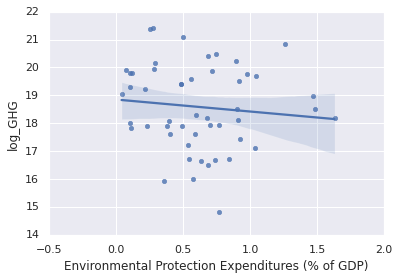

In [17]:
# //  Import seaborn which acts as library that uses Matplotlib underneath to plot graphs.
import seaborn as sns
sns.set()
sns.regplot(x='Environmental Protection Expenditures (% of GDP)',y='log_GHG',data=df_merged)

In [18]:
from scipy.stats import linregress

In [19]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=df_merged['Environmental Protection Expenditures (% of GDP)'], y=df_merged['log_GHG'])

In [20]:
# //  Calculated line of best fit, vega-lite has calculated r squared 
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))

y =  -0.43  * x +  18.85
